
## Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?



Inspect the Data!
1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.


3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue
5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.


6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.


8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

11.
Drop those duplicates using the .drop_duplicates() function.


12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative
15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.


In [167]:
import pandas as pd
import glob

In [169]:
csv_files = glob.glob(r"E:\DATA SCIENCE\PANDAS SMIT\US Census data Analysis\states*.csv")
print("Files found:", csv_files)

Files found: ['E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states0.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states1.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states2.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states3.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states4.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states5.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states6.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states7.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states8.csv', 'E:\\DATA SCIENCE\\PANDAS SMIT\\US Census data Analysis\\states9.csv']


In [171]:
df_list = [pd.read_csv(file) for file in csv_files] 

In [173]:
us_census = pd.concat(df_list, ignore_index=True)  

In [175]:
print(us_census.head())

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

In [177]:
us_census.sample(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
40,4,North Dakota,721640,2.832682926829267%,87.44829268292683%,1.2843902439024397%,5.651219512195119%,0.9619512195121945%,NaN,$58188.112195121954,367963M_353677F
23,5,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F
32,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,$55916.469696969696,929606M_939759F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
51,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F


In [179]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [181]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [183]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [185]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True).astype(float).round(2)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dell\AppData\Local\Temp\ipykernel_14356\3690202661.py:1: SyntaxWarning: invalid escape sequence '\$'
  us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True).astype(float).round(2)


In [187]:
us_census['Income'].head()

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64

In [189]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78,19087135M_19334329F


In [191]:
percent = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for col in percent:
    # Step 1: Ensure everything is string for .str to work
    us_census[col] = us_census[col].astype(str)
    
    # Step 2: Remove % symbol
    us_census[col] = us_census[col].str.replace('%', '', regex=False)
    
    # Step 3: Convert to numeric (float), coercing errors to NaN, then round
    us_census[col] = pd.to_numeric(us_census[col], errors='coerce').round(2)
us_census.head()

# astype(str): forces all values to strings so .str works without error.

# str.replace('%', '', regex=False): removes the % character.

# pd.to_numeric(..., errors='coerce'): safely converts the string to a number. If conversion fails (e.g., a bad value), it becomes NaN.

# .round(2): rounds the numbers to two decimal places.

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F


In [193]:
us_census.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
dtype: int64

In [195]:
us_census.duplicated().sum()

0

In [197]:
# Split the 'GenderPop' column into 'Men' and 'Women'
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)

# Remove 'M' and 'F' characters and convert to numeric
us_census['Men'] = pd.to_numeric(us_census['Men'].str.replace('M', '', regex=False))
us_census['Women'] = pd.to_numeric(us_census['Women'].str.replace('F', '', regex=False))

# Drop the original 'GenderPop' column
us_census.drop(columns='GenderPop', inplace=True, errors='ignore')

# Display the cleaned DataFrame
us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329.0


In [199]:
import matplotlib.pyplot as plt
us_census.isna().sum()


Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
Men           0
Women         3
dtype: int64

In [201]:
us_census = us_census.dropna(subset=['Pacific'])


In [203]:
us_census.isna().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       0
Income        0
Men           0
Women         3
dtype: int64

# Visualization

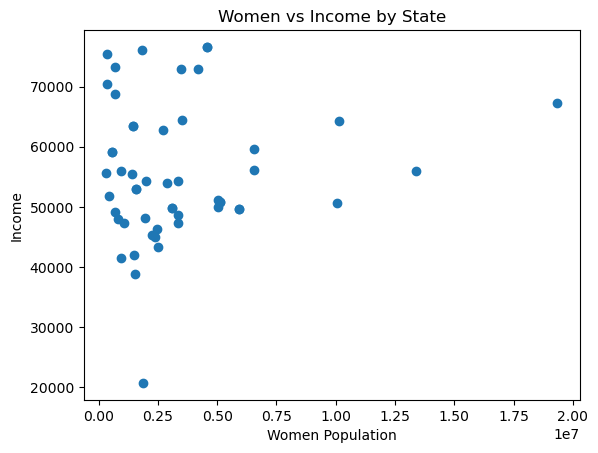

In [206]:
# Scatterplot for Women vs. Income (
plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Women Population')
plt.ylabel('Income')
plt.title('Women vs Income by State')
plt.show()

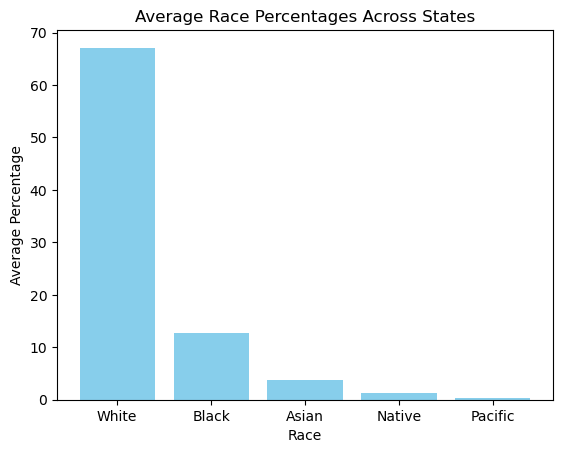

In [208]:
# Bar Chart (Total average percentage of each race)
race_columns = ['White', 'Black', 'Asian', 'Native', 'Pacific']
avg_race_percentages = us_census[race_columns].mean()
plt.bar(race_columns, avg_race_percentages, color='skyblue')
plt.title('Average Race Percentages Across States')
plt.ylabel('Average Percentage')
plt.xlabel('Race')
plt.show()

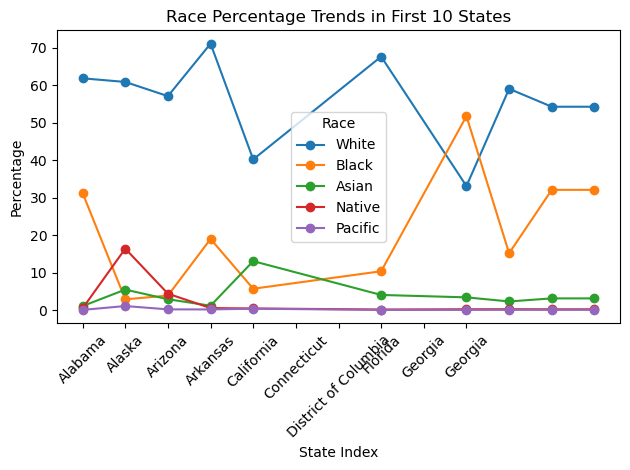

In [210]:
# Line Chart (Percentage trend across first 10 states)
# Plot line chart for race percentages across the first 10 rows (states)
us_census_subset = us_census[race_columns].head(10)
us_census_subset.plot(kind='line', marker='o')
plt.title('Race Percentage Trends in First 10 States')
plt.xlabel('State Index')
plt.ylabel('Percentage')
plt.xticks(ticks=range(10), labels=us_census['State'].head(10), rotation=45)
plt.legend(title='Race')
plt.tight_layout()
plt.show()

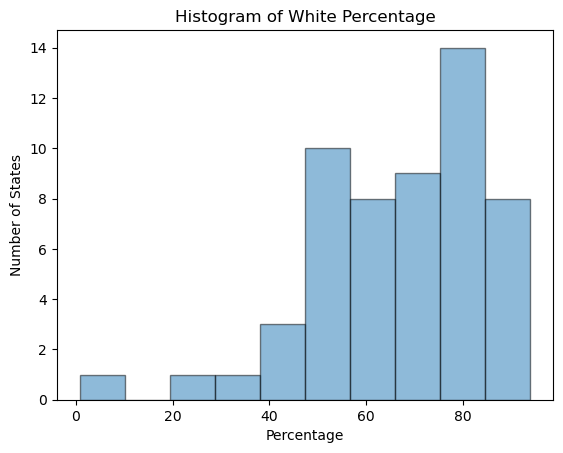

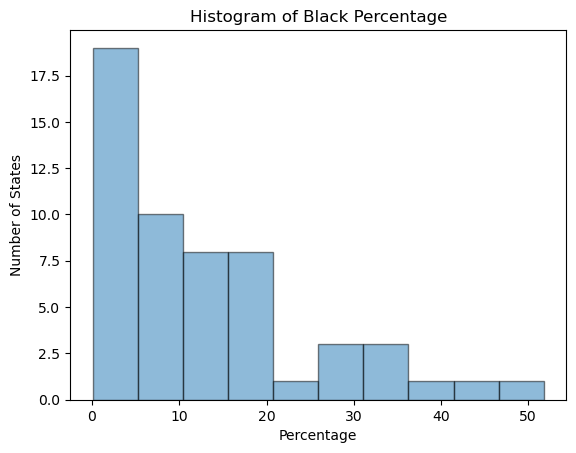

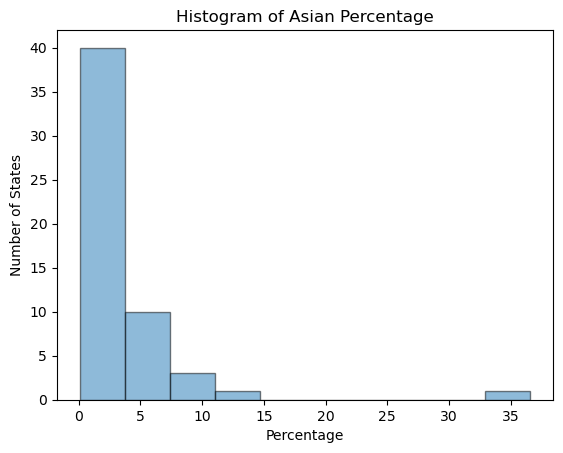

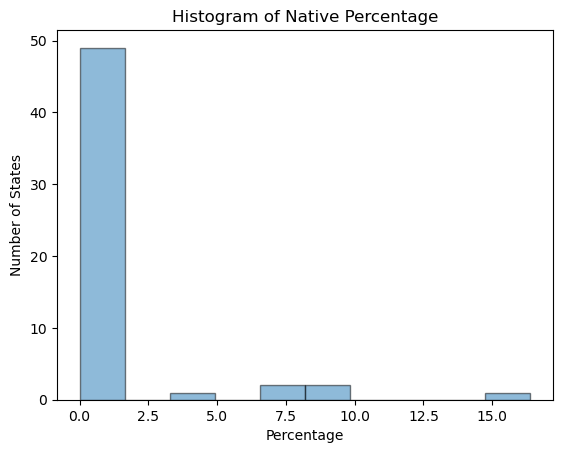

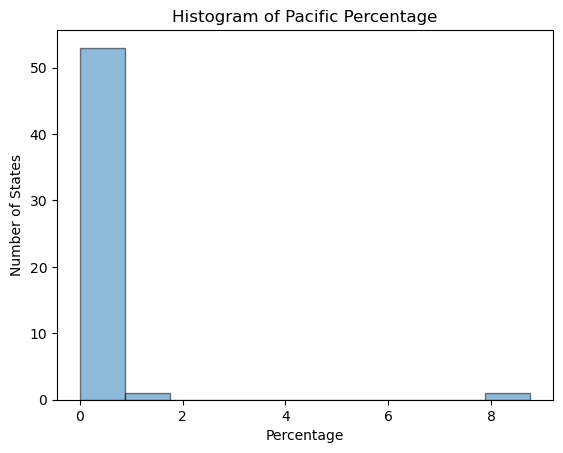

In [212]:
# Histogram (Distribution of values in each race column)
for col in race_columns:
    plt.hist(us_census[col], bins=10, edgecolor='black', alpha=0.5)
    plt.title(f'Histogram of {col} Percentage')
    plt.xlabel('Percentage')
    plt.ylabel('Number of States')
    plt.show()

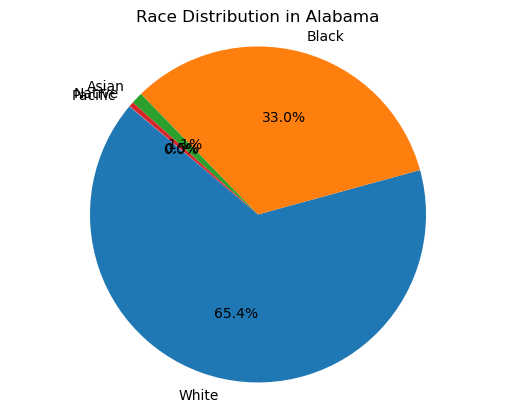

In [214]:
# Pie Chart (Average race distribution in a single state or overall)
state_race_data = us_census.loc[0, race_columns]
plt.pie(state_race_data, labels=race_columns, autopct='%1.1f%%', startangle=140)
plt.title(f"Race Distribution in {us_census.loc[0, 'State']}")
plt.axis('equal')  # Equal aspect ratio ensures the pie is round.
plt.show()

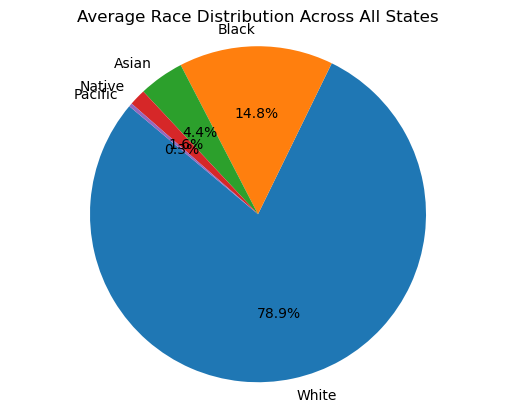

In [216]:
# Option B: Average across all states
avg_race_data = us_census[race_columns].mean()
plt.pie(avg_race_data, labels=avg_race_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Race Distribution Across All States")
plt.axis('equal')
plt.show()

<Figure size 1000x600 with 0 Axes>

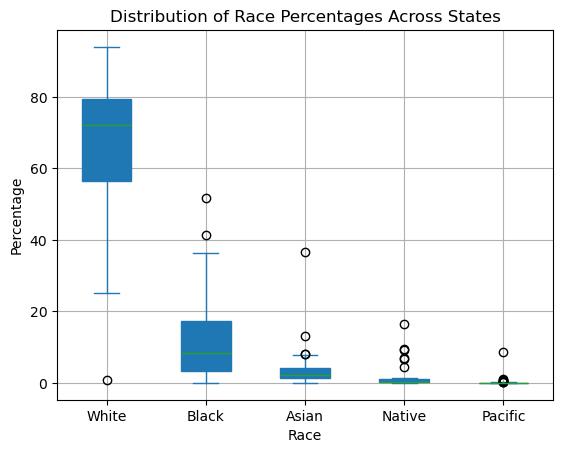

In [218]:
# box plot
race_columns = ['White', 'Black', 'Asian', 'Native', 'Pacific']
plt.figure(figsize=(10, 6)) 
us_census[race_columns].plot(kind='box', patch_artist=True)
plt.title('Distribution of Race Percentages Across States')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.grid(True)
plt.show()


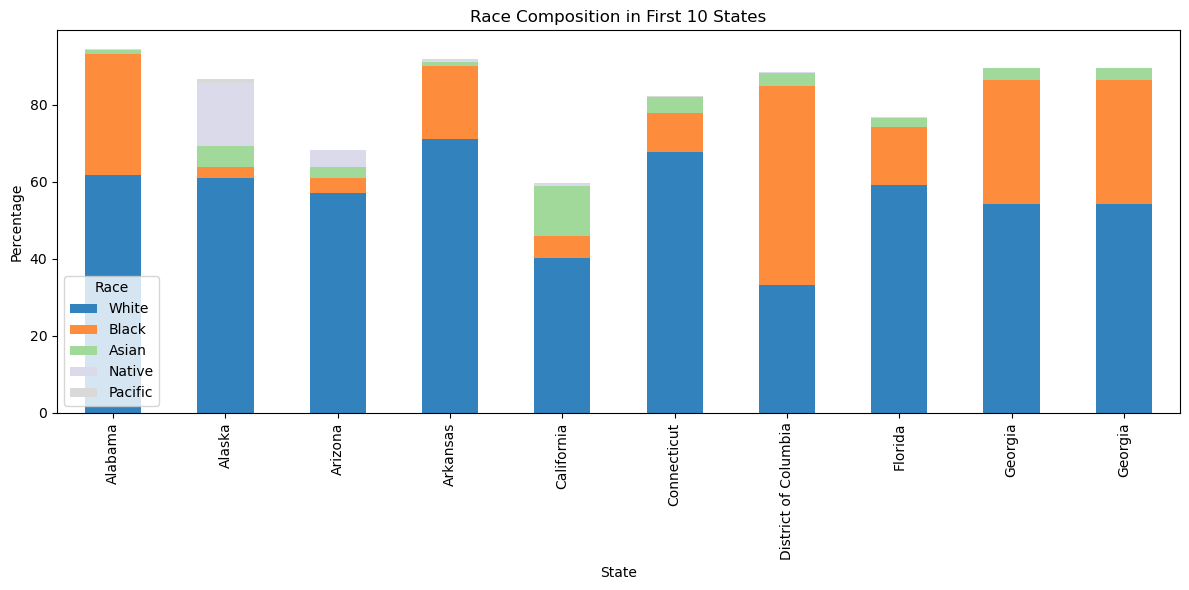

In [220]:
# Stacked Bar Chart – Race Composition by 

subset = us_census[['State'] + race_columns].head(10)
subset.set_index('State', inplace=True)
subset.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Race Composition in First 10 States')
plt.ylabel('Percentage')
plt.xlabel('State')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

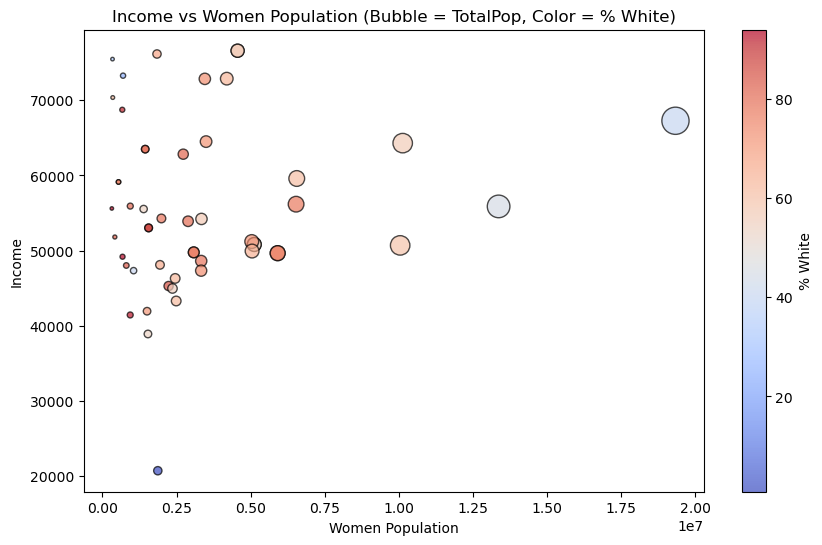

In [222]:
# Scatter Plot with Size and Color – Income vs. Women, Bubble = TotalPop

plt.figure(figsize=(10, 6))
plt.scatter(us_census['Women'], us_census['Income'],
s=us_census['TotalPop'] / 100000,  # bubble size
c=us_census['White'],              # color by % White
cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.xlabel('Women Population')
plt.ylabel('Income')
plt.title('Income vs Women Population (Bubble = TotalPop, Color = % White)')
plt.colorbar(label='% White')
plt.show()

In [224]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: E:\anaconda\python.exe -m pip install --upgrade pip


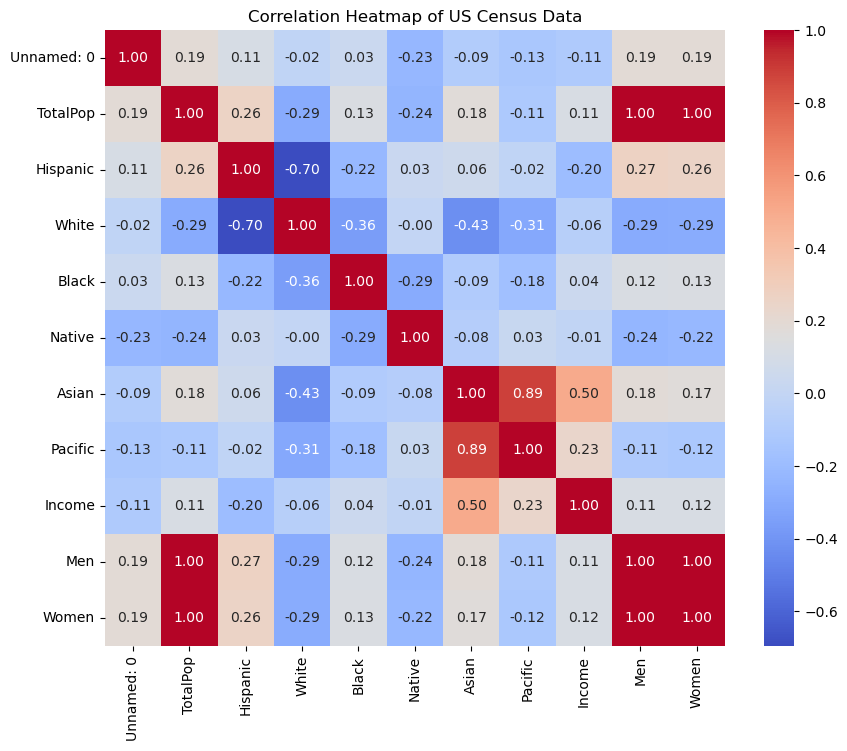

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = us_census.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of US Census Data')
plt.show()

# MODEL IMPLEMETATION

## 1. Income Prediction (Regression)

Root Mean Squared Error (RMSE): 9484.536307968807
R² Score: 0.66522425570352


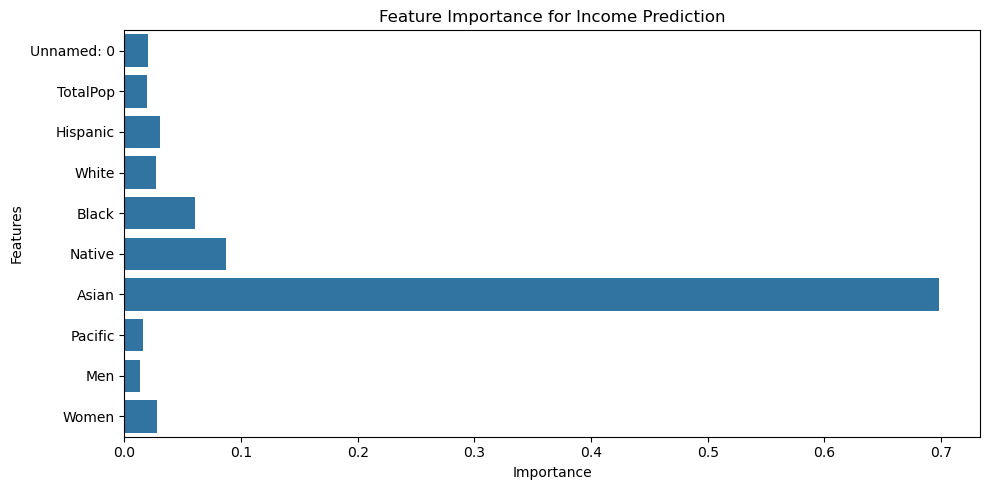

In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare features and target
X = us_census.drop(columns=['State', 'Income'], errors='ignore')  # Features
y = us_census['Income']  # Target

# Step 2: Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
predictions = model.predict(X_test)

# Step 6: Evaluate the model
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Step 7: Optional - Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance for Income Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Dominant Demographic Group Classification
## We'll classify each state based on which group (Hispanic, White, Black, Native, Asian, Pacific) has the highest population percentage.

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Example classification target (e.g., 1 = high income, 0 = low income)
# You should modify this based on your dataset
us_census['Income_Class'] = (us_census['Income'] > us_census['Income'].median()).astype(int)

# Prepare features and target
X = us_census.drop(columns=['State', 'Income', 'Income_Class'], errors='ignore')
y = us_census['Income_Class']

# Handle missing values
X = X.fillna(0)

# One-Hot Encoding for categorical columns (manually converting 'White', 'Black', etc.)
X = pd.get_dummies(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation with zero_division fix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# Clustering States by Demographics (KMeans)
## This is useful for exploring unsupervised patterns in state-level data.

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



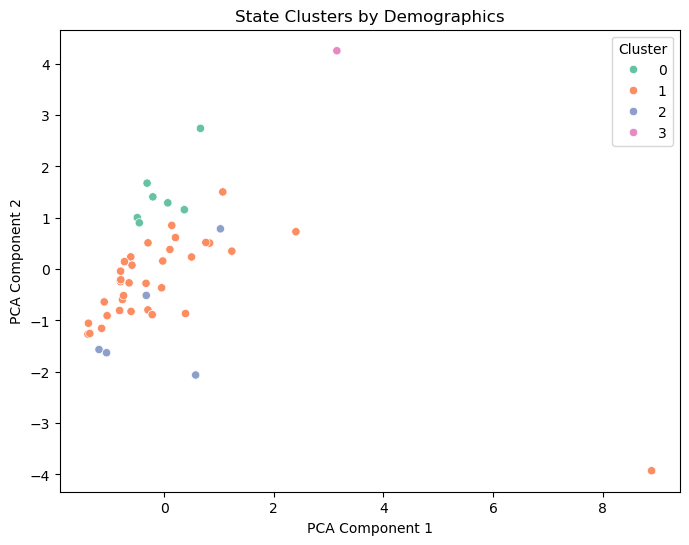

In [259]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set the environment variable to avoid memory leak in KMeans with MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Select demographic features
X = us_census[race_columns].fillna(0)

# Normalize the data
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
us_census['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=us_census['Cluster'], palette='Set2')
plt.title("State Clusters by Demographics")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
